In [1]:
pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 271.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully un

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflowjs as tfjs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/HaibaraAi-afk/Capstone/refs/heads/main/Dataset/converted_data.csv?token=GHSAT0AAAAAACX26274XJYSFK23IZKQHISYZZZN7FA')
df

,income,age,dependents,occupation,city_Tier,bills,bills_percentage,groceries,groceries_percentage,transport,...,entertainment,entertainment_percentage,healthcare,healthcare_percentage,education,education_percentage,utilities,utilities_percentage,saving,saving_percentage
0,8.352969e+06,49,0,Self_Employed,Tier_1,2918791.055,34.943159,1.555157e+06,18.618016,4.934563e+05,...,287466.15970,3.441485,289474.11770,3.465524,0.000000e+00,0.000000,7.004870e+05,8.386084,2.108137e+06,25.238176
1,5.026049e+06,34,2,Retired,Tier_2,1167923.603,23.237409,6.489336e+05,12.911406,2.887451e+05,...,196531.73630,3.910263,212832.55350,4.234590,2.903740e+05,5.777380,4.098855e+05,8.155223,1.810823e+06,36.028758
2,9.425290e+06,35,1,Student,Tier_3,2688879.241,28.528345,1.464673e+06,15.539823,6.028199e+05,...,322482.42500,3.421459,407665.67050,4.325232,5.913357e+05,6.273926,7.479265e+05,7.935315,2.599507e+06,27.580129
3,1.898539e+07,21,0,Self_Employed,Tier_3,5037015.552,26.531014,3.692149e+06,19.447323,1.329770e+06,...,534853.88820,2.817187,855393.35190,4.505536,0.000000e+00,0.000000,1.619536e+06,8.530437,5.916668e+06,31.164326
4,4.654912e+06,52,4,Professional,Tier_2,1632442.268,35.069242,6.974629e+05,14.983374,2.388069e+05,...,123540.76550,2.653987,218772.90000,4.699829,2.704432e+05,5.809846,3.009423e+05,6.465049,1.172501e+06,25.188459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7.656137e+06,51,4,Self_Employed,Tier_1,4046629.117,52.854712,1.389138e+06,18.144113,3.900220e+05,...,226512.43510,2.958573,362811.72000,4.738835,5.316953e+05,6.944694,4.916365e+05,6.421470,2.176918e+05,2.843363
19996,1.689705e+07,21,1,Student,Tier_2,3897870.024,23.068349,3.160465e+06,18.704244,8.669936e+05,...,440954.68430,2.609655,510228.93420,3.019634,9.888752e+05,5.852355,1.282058e+06,7.587470,5.749602e+06,34.027258
19997,7.598333e+06,30,1,Professional,Tier_2,3323258.609,43.736682,1.293923e+06,17.029037,4.666206e+05,...,294151.72470,3.871267,379012.83440,4.988105,7.317656e+05,9.630608,6.852074e+05,9.017865,4.243931e+05,5.585345
19998,2.211087e+07,27,2,Professional,Tier_1,9829738.331,44.456583,3.543841e+06,16.027596,1.543494e+06,...,883589.02190,3.996174,992605.63300,4.489220,1.167190e+06,5.278804,2.166147e+06,9.796752,1.984268e+06,8.974171


#Data Preprocessing

In [4]:
df.head()

,income,age,dependents,occupation,city_Tier,bills,bills_percentage,groceries,groceries_percentage,transport,...,entertainment,entertainment_percentage,healthcare,healthcare_percentage,education,education_percentage,utilities,utilities_percentage,saving,saving_percentage
0,8.352969e+06,49,0,Self_Employed,Tier_1,2918791.055,34.943159,1.555157e+06,18.618016,4.934563e+05,...,287466.1597,3.441485,289474.1177,3.465524,0.0000,0.000000,7.004870e+05,8.386084,2108136.913,25.238176
1,5.026049e+06,34,2,Retired,Tier_2,1167923.603,23.237409,6.489336e+05,12.911406,2.887451e+05,...,196531.7363,3.910263,212832.5535,4.234590,290373.9563,5.777380,4.098855e+05,8.155223,1810823.089,36.028758
2,9.425290e+06,35,1,Student,Tier_3,2688879.241,28.528345,1.464673e+06,15.539823,6.028199e+05,...,322482.4250,3.421459,407665.6705,4.325232,591335.7214,6.273926,7.479265e+05,7.935315,2599507.155,27.580129
3,1.898539e+07,21,0,Self_Employed,Tier_3,5037015.552,26.531014,3.692149e+06,19.447323,1.329770e+06,...,534853.8882,2.817187,855393.3519,4.505536,0.0000,0.000000,1.619536e+06,8.530437,5916667.660,31.164326
4,4.654912e+06,52,4,Professional,Tier_2,1632442.268,35.069242,6.974629e+05,14.983374,2.388069e+05,...,123540.7655,2.653987,218772.9000,4.699829,270443.2127,5.809846,3.009423e+05,6.465049,1172500.541,25.188459


In [5]:
df.isnull().sum()

,0
income,0
age,0
dependents,0
occupation,0
city_Tier,0
bills,0
bills_percentage,0
groceries,0
groceries_percentage,0
transport,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   income                    20000 non-null  float64
 1   age                       20000 non-null  int64  
 2   dependents                20000 non-null  int64  
 3   occupation                20000 non-null  object 
 4   city_Tier                 20000 non-null  object 
 5   bills                     20000 non-null  float64
 6   bills_percentage          20000 non-null  float64
 7   groceries                 20000 non-null  float64
 8   groceries_percentage      20000 non-null  float64
 9   transport                 20000 non-null  float64
 10  transport_percentage      20000 non-null  float64
 11  entertainment             20000 non-null  float64
 12  entertainment_percentage  20000 non-null  float64
 13  healthcare                20000 non-null  float64
 14  health

In [7]:
df = df.drop(columns=["occupation", "city_Tier",])

In [8]:
print(df['income'].min(), df['income'].max())

243491.1855 202049570.5


In [9]:
# Memilih input dan target
X = df[['income', 'age', 'dependents']]
y = df[['bills', 'groceries', 'transport', 'entertainment', 'healthcare', 'education', 'utilities', 'saving']]

In [ ]:
#Pembagian data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#EDA

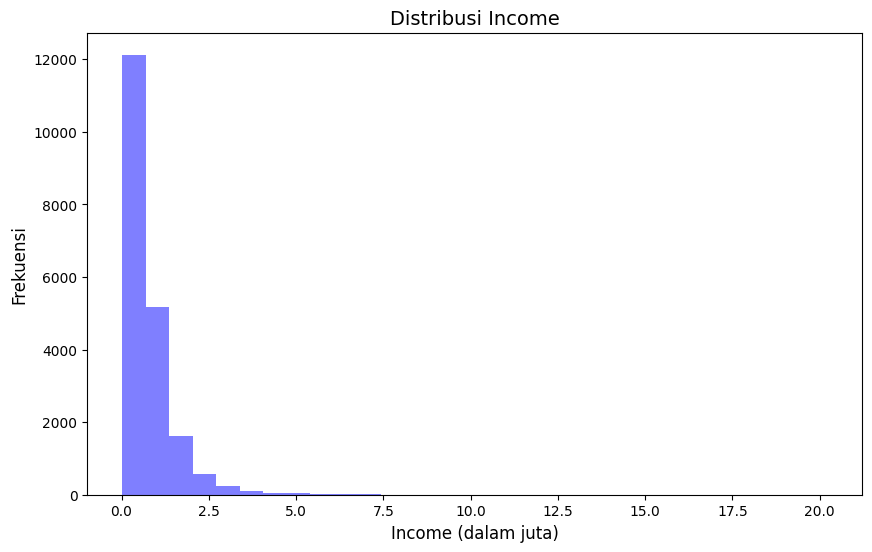

In [ ]:
#Visualisasi distribusi income
plt.figure(figsize=(10, 6))
plt.hist(df['income'] / 1e7, bins=30, color='Blue', alpha=0.5)
plt.xlabel('Income (dalam juta)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Income', fontsize=14)
plt.show()

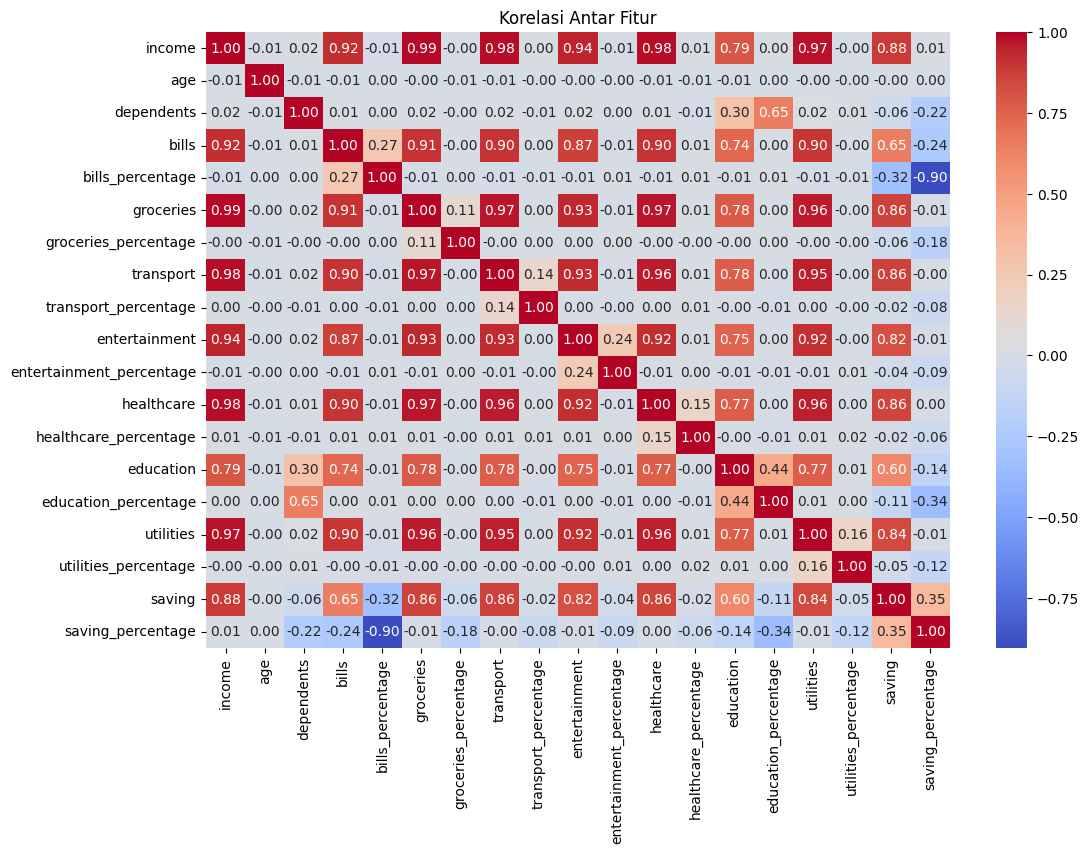

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

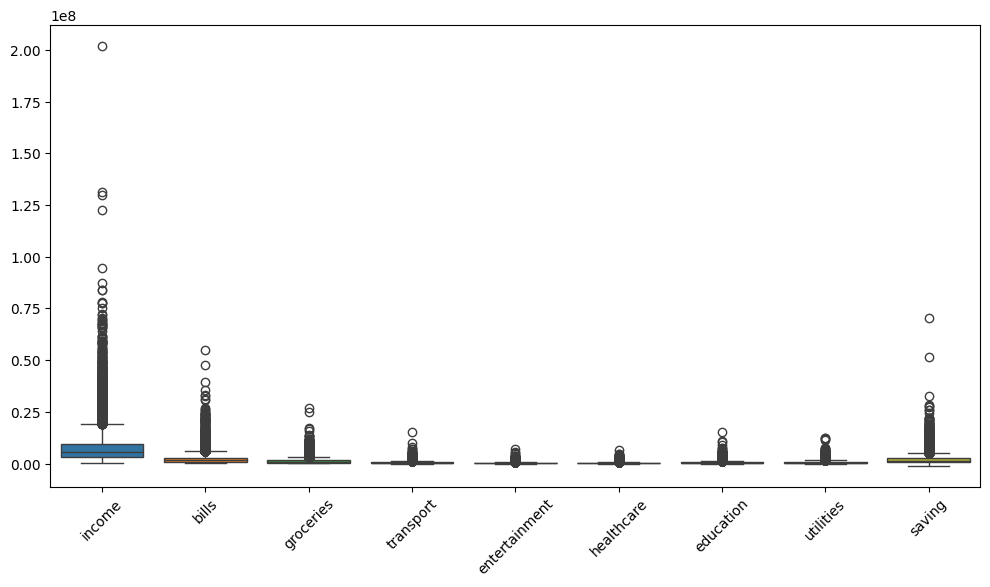

In [14]:
# Visualisasi outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['income', 'bills', 'groceries', 'transport', 'entertainment', 'healthcare', 'education', 'utilities', 'saving']])
plt.xticks(rotation=45)
plt.show()

#RF TF RILL MODEL

In [15]:
# Random Forest Regressor
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mengambil model yang terbaik
best_rf = grid_search.best_estimator_


In [16]:
# Prediksi dari Random Forest untuk digunakan sebagai target
y_train_pred_rf = best_rf.predict(X_train_scaled)


# Define the neural network model
tf_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input shape sesuai dengan fitur
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(y_train.shape[1])  # Output shape sama dengan jumlah target
])

tf_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,288 (36.28 KB)

 Trainable params: 9,288 (36.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model TensorFlow
tf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train model tensorflow with Random Forest prediction as target
tf_history = tf_model.fit(X_train_scaled, y_train_pred_rf, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2855490289664.0000 - mean_absolute_error: 974496.5625 - val_loss: 2845227876352.0000 - val_mean_absolute_error: 956209.8125
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2898466701312.0000 - mean_absolute_error: 972538.8750 - val_loss: 2793695608832.0000 - val_mean_absolute_error: 940281.6250
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2816588906496.0000 - mean_absolute_error: 953690.4375 - val_loss: 2670244134912.0000 - val_mean_absolute_error: 901849.0625
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2634625581056.0000 - mean_absolute_error: 901243.8750 - val_loss: 2473462857728.0000 - val_mean_absolute_error: 838718.8750
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2639173779456.0000 - mean_absolute_error: 852393.7500 - val_loss: 2217777037312.0000 - val_mean_absolute_error: 755617.6875
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2312622309376.0000 -

In [18]:
# Fungsi evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name=""):
    """
    Mengevaluasi model pada training set dan test set, lalu menyusun tabel evaluasi.

    Parameters:
    - model: Model yang akan dievaluasi (Random Forest atau TensorFlow).
    - X_train, X_test: Fitur training dan testing.
    - y_train, y_test: Target training dan testing.
    - model_name (str): Nama model untuk menampilkan di tabel.

    Returns:
    - DataFrame berisi metrik evaluasi.
    """
    # Prediksi untuk training dan test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Hitung metrik untuk training set
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Hitung metrik untuk test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Susun hasil ke dalam DataFrame
    eval_table = pd.DataFrame({
        "Model": [model_name, model_name],
        "Dataset": ["Training", "Test"],
        "MAE": [train_mae, test_mae],
        "MSE": [train_mse, test_mse],
        "RMSE": [train_rmse, test_rmse],
        "R²": [train_r2, test_r2]
    })

    return eval_table
y_test_pred_rf = best_rf.predict(X_test_scaled)
# Evaluasi Random Forest
rf_eval_table = evaluate_model(best_rf, X_train_scaled, X_test_scaled, y_train, y_test, model_name="Random Forest")
print(rf_eval_table)

# Evaluasi TensorFlow
tf_eval_table = evaluate_model(tf_model, X_train_scaled, X_test_scaled, y_train_pred_rf, y_test_pred_rf, model_name="TensorFlow")
print(tf_eval_table)

           Model   Dataset            MAE           MSE           RMSE  \
0  Random Forest  Training  176435.462817  1.640294e+11  405005.382626   
1  Random Forest      Test  205585.422780  3.406860e+11  583683.094015   

         R²  
0  0.933282  
1  0.886790  
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
        Model   Dataset           MAE           MSE           RMSE        R²
0  TensorFlow  Training  76784.684520  4.793990e+10  218951.831197  0.948330
1  TensorFlow      Test  74892.155763  8.291571e+10  287950.883526  0.924869


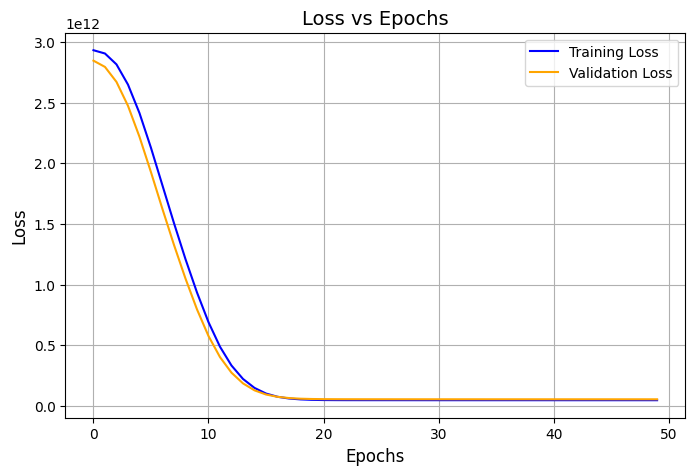

In [19]:
# Fungsi untuk menampilkan grafik loss
def plot_loss(history):
    """
    Membuat grafik perbandingan loss antara training dan validation.

    Parameters:
    - history: Objek history yang dihasilkan dari model.fit().
    """
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss vs Epochs', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Contoh penggunaan
plot_loss(tf_history)


#Testing

In [20]:
# Fungsi untuk memproses input pengguna
def preprocess_user_input(income, age, dependents):
    """
    Preprocess input pengguna agar sesuai dengan fitur yang digunakan saat pelatihan model.

    Parameters:
    - income: Pendapatan pengguna.
    - age: Usia pengguna.
    - dependents: Jumlah tanggungan pengguna.

    Returns:
    - Data pengguna yang sudah diproses dan distandarisasi.
    """

    # Preprocess input menjadi DataFrame
    input_data = pd.DataFrame({
        'income': [income],
        'age': [age],
        'dependents': [dependents],
    })

    # Standarisasi input
    input_scaled = scaler.transform(input_data)
    return input_scaled


# Fungsi untuk memprediksi berdasarkan input pengguna
def predict_user_input(income, age, dependents):
    """
    Menghasilkan prediksi dari model Random Forest dan TensorFlow.

    Parameters:
    - income: Pendapatan pengguna.
    - age: Usia pengguna.
    - dependents: Jumlah tanggungan pengguna.

    Returns:
    - Prediksi dari Random Forest.
    - Prediksi dari TensorFlow.
    """
    # Preprocess input
    input_scaled = preprocess_user_input(income, age, dependents)

    # Prediksi dengan model Random Forest
    rf_prediction = best_rf.predict(input_scaled)

    # Prediksi dengan model TensorFlow
    tf_prediction = tf_model.predict(input_scaled)

    return rf_prediction, tf_prediction

In [21]:
# Input dari pengguna
income = float(input("Masukkan pendapatan (Income): "))
age = int(input("Masukkan usia (Age): "))
dependents = int(input("Masukkan jumlah tanggungan (Dependents): "))

# Prediksi
rf_pred, tf_pred = predict_user_input(income, age, dependents)

# Tampilkan hasil prediksi
print("\nHasil Prediksi:")
print("Prediksi dari model Random Forest:", rf_pred)
print("Prediksi dari model TensorFlow:", tf_pred)

Masukkan pendapatan (Income): 10000000
Masukkan usia (Age): 24
Masukkan jumlah tanggungan (Dependents): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Hasil Prediksi:
Prediksi dari model Random Forest: [[2803348.20395831 1591849.51123412  640621.34774595  346368.54155646
   402966.5036104        0.          828752.47765152 3436629.87730827]]
Prediksi dari model TensorFlow: [[3087934.8  1633304.    659823.9   355963.5   408479.66  617661.3
   820925.7  2628621.2 ]]


#Convert

In [ ]:
# Save model in Keras format
model_name = "tf_modelasli.keras"
export_path = f"./{model_name}"
tf_model.save(export_path)
print(f"Model saved to: {export_path}")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# Save TFLite model
tflite_path = "tf_modelasli.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)
print(f"TFLite model saved to: {tflite_path}")

# Convert to model json
tfjs_path = "tf_modelasli"
tfjs.converters.save_keras_model(tf_model, tfjs_path)
print(f"Model saved to: {tfjs_path}")

Model saved to: ./tf_modelasli.keras
Saved artifact at '/tmp/tmp5zhp8ivh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  133163279752832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133163044984208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133163044983680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133163044980160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133163044985440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133163044983328: TensorSpec(shape=(), dtype=tf.resource, name=None)


TFLite model saved to: tf_modelasli.tflite
failed to lookup keras version from the file,
    this is likely a weight only file
Model saved to: tf_modelasli


In [ ]:
# Validate TFLite model with dummy input
interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test with dummy data
dummy_input = np.random.rand(1, X_train_scaled.shape[1]).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], dummy_input)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

print(f"Predicted output from TFLite model: {output_data}")

Predicted output from TFLite model: [[3929959.   2082736.5   844077.7   455212.66  520728.03  788413.25
  1049712.2  3347790.2 ]]
